In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score

Importing modules

In [4]:
ti=pd.read_csv("titanic.csv")

Importing dataset

In [5]:
ti.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Sample data

We want to predict whether a person survived or not.So here our target variable is 'Survived' which contains binary data.So our model is classification model.

In [4]:
ti.shape

(891, 12)

Dataset contains 891 rows and 12 columns

In [5]:
ti.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Dataset have integer,float and categorical data

# EDA

In [6]:
ti.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have missing values in 3 columns

In [7]:
ti.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Statistical measures

# Univariate Analysis

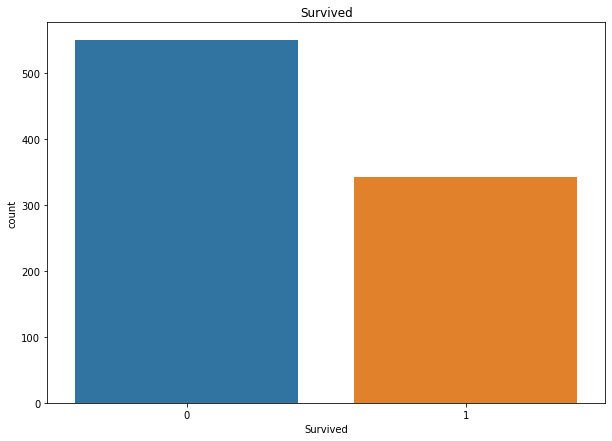

0    549
1    342
Name: Survived, dtype: int64


In [14]:
plt.figure(figsize=(10,7))
sns.countplot('Survived',data=ti)
plt.title("Survived")
plt.show()
print(ti['Survived'].value_counts())

Our target variable is imbalanced. Many people are not survived,549 peoples are not survived

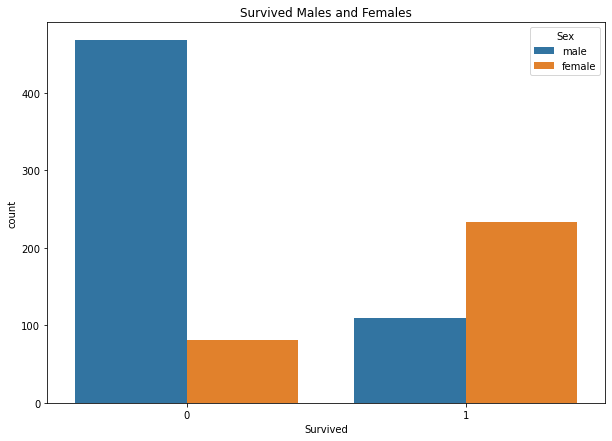

male      577
female    314
Name: Sex, dtype: int64


In [40]:
plt.figure(figsize=(10,7))
sns.countplot(x='Survived',hue='Sex',data=ti)
plt.title("Survived Males and Females")
plt.show()
print(ti['Sex'].value_counts())

Most of males are not survived 

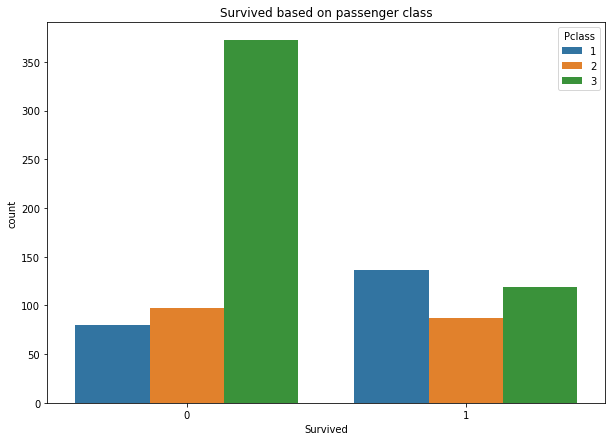

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [38]:
plt.figure(figsize=(10,7))
sns.countplot(x='Survived',hue='Pclass',data=ti)
plt.title("Survived based on passenger class")
plt.show()
print(ti['Pclass'].value_counts())

Most passengers in third class not survived and first class passengers where mostly survived.

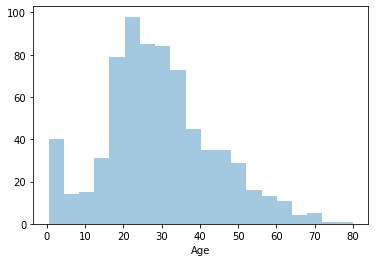

In [19]:
sns.distplot(ti['Age'].dropna(),kde=False)
plt.show()

Most of the people where age between 20-30.

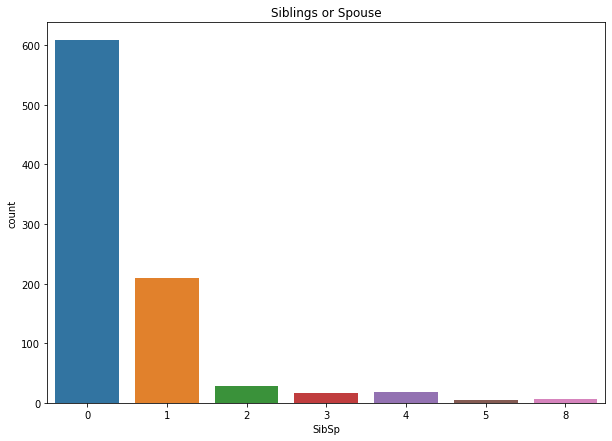

In [20]:
plt.figure(figsize=(10,7))
sns.countplot(x='SibSp',data=ti)
plt.title("Siblings or Spouse")
plt.show()

Maximum people does not have siblings or spouse

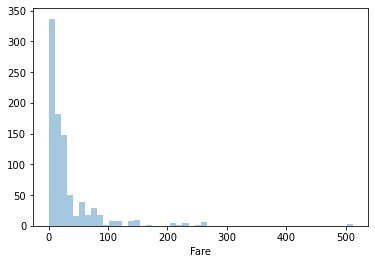

In [21]:
sns.distplot(ti['Fare'],kde=False)
plt.show()

Most fare is between 0-70

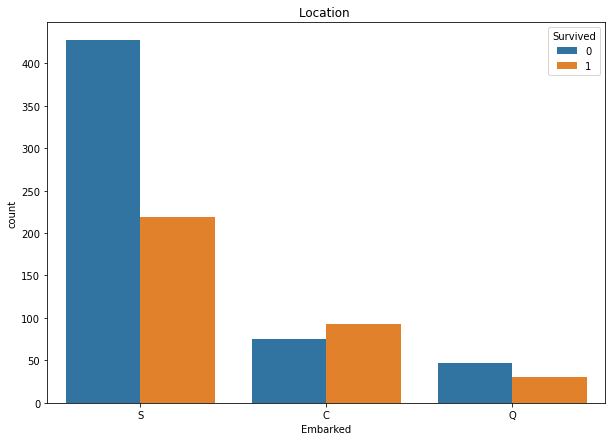

S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [41]:
plt.figure(figsize=(10,7))
sns.countplot(x='Embarked',hue='Survived',data=ti)
plt.title("Location ")
plt.show()
print(ti['Embarked'].value_counts())

Most travelers mounted from southampton not survived and most of them were not survived

# Data Cleaning

Removing null values

In [25]:
ti.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

'Cabin' column has 687 missing values among 891 rows. So 'Cabin' column does not affect in our dataset and we cannot remove missing data using mean or mode..so we drop this column from our dataset.

In [26]:
ti=ti.drop(['Cabin'],axis=1)

Column dropped

In [27]:
ti.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Dataset after dropping column cabin

In [28]:
ti['Age'].mean()

29.69911764705882

Mean value of column 'Age'

In [29]:
ti['Age'].fillna(ti['Age'].mean(),inplace=True)

Treated missing values with mean

In [31]:
ti['Embarked'].mode()[0]

'S'

'S' most frequent in column

In [35]:
ti['Embarked'].fillna(ti['Embarked'].mode()[0],inplace=True)

Replaced missing value with mode

In [36]:
ti.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now we don't have any missing values

# Encoding

In [42]:
ti.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

We replaced the categorical data in columns 'Sex' and 'Embarked' with 0,1,2 respectively

In [43]:
ti.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


We have converted columns

In [44]:
ti.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

Dropped unwanted columns for prediction

In [45]:
ti.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

Columns after dropping

Seperating features and target

In [46]:
x=ti.drop('Survived', axis = 1)
y = ti['Survived']

Seperated features in x and target in y

In [47]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


Features

In [48]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Target

# Balancing Target Variable 

# Over Sampling

In [49]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

Balanced data using smote

In [50]:
print(y.value_counts())

0    549
1    549
Name: Survived, dtype: int64


After balancing

# Model Building

In [51]:
#logistic regression
lr=LogisticRegression()

Stored in instance variable

In [52]:
for i in range(0,110):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuarcy is:- 0.7687927107061503
At random state 0,the testing accuracy is:- 0.7545454545454545


At random state 1,the training accuarcy is:- 0.7687927107061503
At random state 1,the testing accuracy is:- 0.7545454545454545


At random state 2,the training accuarcy is:- 0.7574031890660592
At random state 2,the testing accuracy is:- 0.7863636363636364


At random state 3,the training accuarcy is:- 0.7722095671981777
At random state 3,the testing accuracy is:- 0.740909090909091


At random state 4,the training accuarcy is:- 0.7619589977220956
At random state 4,the testing accuracy is:- 0.7681818181818182


At random state 5,the training accuarcy is:- 0.7539863325740319
At random state 5,the testing accuracy is:- 0.7818181818181819


At random state 6,the training accuarcy is:- 0.7574031890660592
At random state 6,the testing accuracy is:- 0.7863636363636364


At random state 7,the training accuarcy is:- 0.7710706150341685
At random state 7,the testing accu

At random state 65,the training accuarcy is:- 0.7574031890660592
At random state 65,the testing accuracy is:- 0.7818181818181819


At random state 66,the training accuarcy is:- 0.7608200455580866
At random state 66,the testing accuracy is:- 0.7681818181818182


At random state 67,the training accuarcy is:- 0.7574031890660592
At random state 67,the testing accuracy is:- 0.7954545454545454


At random state 68,the training accuarcy is:- 0.7699316628701595
At random state 68,the testing accuracy is:- 0.75


At random state 69,the training accuarcy is:- 0.7630979498861048
At random state 69,the testing accuracy is:- 0.7545454545454545


At random state 70,the training accuarcy is:- 0.7642369020501139
At random state 70,the testing accuracy is:- 0.7454545454545455


At random state 71,the training accuarcy is:- 0.7676537585421412
At random state 71,the testing accuracy is:- 0.7227272727272728


At random state 72,the training accuarcy is:- 0.7733485193621867
At random state 72,the testing a

Here we splitted data into train test. Selecting best random state. Here I choose random state 101 which is least difference in accuracy score  in trainingand testing.

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
acc_l=classification_report(y_test,predlr)
print(acc_l)

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       110
           1       0.76      0.78      0.77       110

    accuracy                           0.77       220
   macro avg       0.77      0.77      0.77       220
weighted avg       0.77      0.77      0.77       220



Trained and predicted and find accuracy score=77

In [54]:
#decision tree classifier
dt=DecisionTreeClassifier()

Stored in instance variable

In [56]:
for i in range(0,150):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuarcy is:- 0.9886104783599089
At random state 0,the testing accuracy is:- 0.7818181818181819


At random state 1,the training accuarcy is:- 0.9840546697038725
At random state 1,the testing accuracy is:- 0.8045454545454546


At random state 2,the training accuarcy is:- 0.9817767653758542
At random state 2,the testing accuracy is:- 0.8272727272727273


At random state 3,the training accuarcy is:- 0.9851936218678815
At random state 3,the testing accuracy is:- 0.8


At random state 4,the training accuarcy is:- 0.9840546697038725
At random state 4,the testing accuracy is:- 0.8090909090909091


At random state 5,the training accuarcy is:- 0.9829157175398633
At random state 5,the testing accuracy is:- 0.7909090909090909


At random state 6,the training accuarcy is:- 0.9886104783599089
At random state 6,the testing accuracy is:- 0.7727272727272727


At random state 7,the training accuarcy is:- 0.9829157175398633
At random state 7,the testing accuracy is:- 0.79

At random state 74,the testing accuracy is:- 0.7681818181818182


At random state 75,the training accuarcy is:- 0.9840546697038725
At random state 75,the testing accuracy is:- 0.7681818181818182


At random state 76,the training accuarcy is:- 0.9851936218678815
At random state 76,the testing accuracy is:- 0.7954545454545454


At random state 77,the training accuarcy is:- 0.9840546697038725
At random state 77,the testing accuracy is:- 0.8


At random state 78,the training accuarcy is:- 0.9851936218678815
At random state 78,the testing accuracy is:- 0.740909090909091


At random state 79,the training accuarcy is:- 0.989749430523918
At random state 79,the testing accuracy is:- 0.7636363636363637


At random state 80,the training accuarcy is:- 0.9829157175398633
At random state 80,the testing accuracy is:- 0.7909090909090909


At random state 81,the training accuarcy is:- 0.9863325740318907
At random state 81,the testing accuracy is:- 0.7954545454545454


At random state 82,the training ac

At random state 139,the training accuarcy is:- 0.9851936218678815
At random state 139,the testing accuracy is:- 0.7954545454545454


At random state 140,the training accuarcy is:- 0.9874715261958997
At random state 140,the testing accuracy is:- 0.7818181818181819


At random state 141,the training accuarcy is:- 0.9817767653758542
At random state 141,the testing accuracy is:- 0.7772727272727272


At random state 142,the training accuarcy is:- 0.9851936218678815
At random state 142,the testing accuracy is:- 0.7727272727272727


At random state 143,the training accuarcy is:- 0.9851936218678815
At random state 143,the testing accuracy is:- 0.7545454545454545


At random state 144,the training accuarcy is:- 0.9874715261958997
At random state 144,the testing accuracy is:- 0.7818181818181819


At random state 145,the training accuarcy is:- 0.9874715261958997
At random state 145,the testing accuracy is:- 0.7909090909090909


At random state 146,the training accuarcy is:- 0.9840546697038725
At 

Here we splitted data into train test. Selecting best random state. Here I choose random state 111 which is least difference in accuracy score  in trainingand testing.

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=111)
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
acc_l=classification_report(y_test,preddt)
print(acc_l)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.84      0.83      0.83       115

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220



Trained and predicted and find accuracy score=83

In [58]:
#support vector classifier
sv=SVC()

Stored in instance variable

In [59]:
for i in range(0,150):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    sv.fit(x_train,y_train)
    pred_train=sv.predict(x_train)
    pred_test=sv.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuarcy is:- 0.6617312072892938
At random state 0,the testing accuracy is:- 0.6363636363636364


At random state 1,the training accuarcy is:- 0.6571753986332574
At random state 1,the testing accuracy is:- 0.6181818181818182


At random state 2,the training accuarcy is:- 0.6469248291571754
At random state 2,the testing accuracy is:- 0.6863636363636364


At random state 3,the training accuarcy is:- 0.6617312072892938
At random state 3,the testing accuracy is:- 0.6454545454545455


At random state 4,the training accuarcy is:- 0.6537585421412301
At random state 4,the testing accuracy is:- 0.6863636363636364


At random state 5,the training accuarcy is:- 0.6548974943052391
At random state 5,the testing accuracy is:- 0.6818181818181818


At random state 6,the training accuarcy is:- 0.6457858769931663
At random state 6,the testing accuracy is:- 0.7045454545454546


At random state 7,the training accuarcy is:- 0.6514806378132119
At random state 7,the testing acc

At random state 64,the training accuarcy is:- 0.6674259681093394
At random state 64,the testing accuracy is:- 0.5818181818181818


At random state 65,the training accuarcy is:- 0.6514806378132119
At random state 65,the testing accuracy is:- 0.6409090909090909


At random state 66,the training accuarcy is:- 0.6492027334851936
At random state 66,the testing accuracy is:- 0.6818181818181818


At random state 67,the training accuarcy is:- 0.6548974943052391
At random state 67,the testing accuracy is:- 0.6409090909090909


At random state 68,the training accuarcy is:- 0.662870159453303
At random state 68,the testing accuracy is:- 0.6409090909090909


At random state 69,the training accuarcy is:- 0.6503416856492027
At random state 69,the testing accuracy is:- 0.6909090909090909


At random state 70,the training accuarcy is:- 0.6537585421412301
At random state 70,the testing accuracy is:- 0.6363636363636364


At random state 71,the training accuarcy is:- 0.6605922551252847
At random state 71,

At random state 128,the training accuarcy is:- 0.6503416856492027
At random state 128,the testing accuracy is:- 0.6909090909090909


At random state 129,the training accuarcy is:- 0.6548974943052391
At random state 129,the testing accuracy is:- 0.6727272727272727


At random state 130,the training accuarcy is:- 0.6514806378132119
At random state 130,the testing accuracy is:- 0.6636363636363637


At random state 131,the training accuarcy is:- 0.6571753986332574
At random state 131,the testing accuracy is:- 0.6545454545454545


At random state 132,the training accuarcy is:- 0.643507972665148
At random state 132,the testing accuracy is:- 0.6818181818181818


At random state 133,the training accuarcy is:- 0.643507972665148
At random state 133,the testing accuracy is:- 0.6727272727272727


At random state 134,the training accuarcy is:- 0.6571753986332574
At random state 134,the testing accuracy is:- 0.6272727272727273


At random state 135,the training accuarcy is:- 0.6571753986332574
At ra

Here we splitted data into train test. Selecting best random state. Here I choose random state 143 which is least difference in accuracy score  in trainingand testing.

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=143)
sv.fit(x_train,y_train)
predsv=sv.predict(x_test)
acc_l=classification_report(y_test,predsv)
print(acc_l)

              precision    recall  f1-score   support

           0       0.60      0.75      0.67       102
           1       0.73      0.57      0.64       118

    accuracy                           0.65       220
   macro avg       0.66      0.66      0.65       220
weighted avg       0.67      0.65      0.65       220



Trained and predicted and find accuracy score=65

In [61]:
#random forest classifier
rf=RandomForestClassifier()

Storing Instance variable

In [62]:
for i in range(0,150):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuarcy is:- 0.9886104783599089
At random state 0,the testing accuracy is:- 0.8181818181818182


At random state 1,the training accuarcy is:- 0.9840546697038725
At random state 1,the testing accuracy is:- 0.8272727272727273


At random state 2,the training accuarcy is:- 0.9817767653758542
At random state 2,the testing accuracy is:- 0.8409090909090909


At random state 3,the training accuarcy is:- 0.9851936218678815
At random state 3,the testing accuracy is:- 0.8227272727272728


At random state 4,the training accuarcy is:- 0.9840546697038725
At random state 4,the testing accuracy is:- 0.8636363636363636


At random state 5,the training accuarcy is:- 0.9829157175398633
At random state 5,the testing accuracy is:- 0.8409090909090909


At random state 6,the training accuarcy is:- 0.9886104783599089
At random state 6,the testing accuracy is:- 0.8227272727272728


At random state 7,the training accuarcy is:- 0.9829157175398633
At random state 7,the testing acc

At random state 64,the training accuarcy is:- 0.9829157175398633
At random state 64,the testing accuracy is:- 0.8136363636363636


At random state 65,the training accuarcy is:- 0.9886104783599089
At random state 65,the testing accuracy is:- 0.8090909090909091


At random state 66,the training accuarcy is:- 0.9863325740318907
At random state 66,the testing accuracy is:- 0.7909090909090909


At random state 67,the training accuarcy is:- 0.9829157175398633
At random state 67,the testing accuracy is:- 0.8181818181818182


At random state 68,the training accuarcy is:- 0.9829157175398633
At random state 68,the testing accuracy is:- 0.8136363636363636


At random state 69,the training accuarcy is:- 0.9806378132118451
At random state 69,the testing accuracy is:- 0.8136363636363636


At random state 70,the training accuarcy is:- 0.9863325740318907
At random state 70,the testing accuracy is:- 0.7954545454545454


At random state 71,the training accuarcy is:- 0.9874715261958997
At random state 71

At random state 127,the training accuarcy is:- 0.9874715261958997
At random state 127,the testing accuracy is:- 0.8181818181818182


At random state 128,the training accuarcy is:- 0.9840546697038725
At random state 128,the testing accuracy is:- 0.8136363636363636


At random state 129,the training accuarcy is:- 0.9840546697038725
At random state 129,the testing accuracy is:- 0.8090909090909091


At random state 130,the training accuarcy is:- 0.9840546697038725
At random state 130,the testing accuracy is:- 0.8090909090909091


At random state 131,the training accuarcy is:- 0.9840546697038725
At random state 131,the testing accuracy is:- 0.8545454545454545


At random state 132,the training accuarcy is:- 0.9863325740318907
At random state 132,the testing accuracy is:- 0.8227272727272728


At random state 133,the training accuarcy is:- 0.9829157175398633
At random state 133,the testing accuracy is:- 0.8272727272727273


At random state 134,the training accuarcy is:- 0.9863325740318907
At 

Here we splitted data into train test. Selecting best random state. Here I choose random state 138 which is least difference in accuracy score  in trainingand testing.

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=138)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
acc_l=classification_report(y_test,predrf)
print(acc_l)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       116
           1       0.88      0.83      0.85       104

    accuracy                           0.86       220
   macro avg       0.87      0.86      0.86       220
weighted avg       0.86      0.86      0.86       220



Trained and predicted and find accuracy score=86

# Cross Validation Score

In [73]:
print("CV score and it's mean of Decision tree classifier:",cross_val_score(dt,x,y,cv=8).mean(),"Accuracy:",accuracy_score(y_test,preddt))
print("CV score and it's mean of Random Forest Classifier:",cross_val_score(rf,x,y,cv=8).mean(),"Accuracy:",accuracy_score(y_test,predrf))
print("CV score and it's mean of Support Vector Classifier:",cross_val_score(sv,x,y,cv=8).mean(),"Accuracy:",accuracy_score(y_test,predsv))
print("CV score and it's mean of Logistic Regression:",cross_val_score(lr,x,y,cv=8).mean(),"Accuarcy:",accuracy_score(y_test,predlr))

CV score and it's mean of Decision tree classifier: 0.7997262773722628 Accuracy: 0.45
CV score and it's mean of Random Forest Classifier: 0.8106289008780281 Accuracy: 0.8636363636363636
CV score and it's mean of Support Vector Classifier: 0.6522664762509256 Accuracy: 0.4818181818181818
CV score and it's mean of Logistic Regression: 0.7558975986459325 Accuarcy: 0.4954545454545455


Random forest least difference so i proceed with random forest calssifier

# Hyper Parameter Tuning

In [72]:
#storin parameters in variable
parameter={'n_estimators': np.arange(25,50),
           'max_depth':np.arange(2,10),
          'criterion':['gini','entropy'],'max_features':['auto', 'sqrt', 'log2']}

In [74]:
GV=GridSearchCV(rf,parameter,cv=8)

Stored instance variable

In [75]:
GV.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49])})

Fitting data

In [76]:
GV.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 26}

Best parameters

In [79]:
best=RandomForestClassifier(criterion='entropy',max_depth=9,max_features='auto',n_estimators=26)
best.fit(x_train,y_train)
predbest=best.predict(x_test)
acc_b=(accuracy_score(y_test,predbest))
print(acc_b*100)

84.54545454545455


Performed with best parameters we got 84.5% of acccuracy

# AOC RUC Curve

In [82]:
#predicting probabilities
y_pred_proba=rf.predict_proba(x_test)[:,1] #threshold value
y_pred_proba

array([0.47      , 0.32      , 0.2285    , 0.87      , 0.        ,
       0.05      , 0.01      , 1.        , 0.3       , 0.99      ,
       0.21      , 0.71      , 0.2       , 0.94483333, 1.        ,
       0.        , 0.2       , 1.        , 0.54      , 1.        ,
       0.        , 0.25      , 0.01      , 0.00472727, 0.9158387 ,
       0.78      , 0.89      , 1.        , 0.19300952, 0.969     ,
       0.15      , 0.7       , 0.        , 0.02      , 0.18      ,
       0.89      , 0.4875    , 1.        , 0.09      , 0.16      ,
       0.03      , 0.48      , 0.53      , 0.17666667, 0.99      ,
       0.99      , 0.19      , 0.        , 1.        , 0.2175    ,
       1.        , 0.        , 0.01      , 0.37583333, 0.055     ,
       0.27383333, 0.07      , 0.        , 0.        , 0.98      ,
       0.11      , 0.03      , 0.02      , 0.06881277, 1.        ,
       0.03      , 0.59      , 0.65      , 0.57      , 0.09      ,
       0.15      , 0.26      , 0.17      , 1.        , 0.     

In [83]:
#calculating roc curves
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

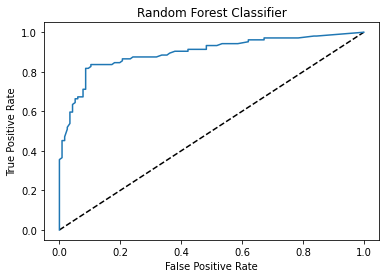

In [84]:
#plotting roc curves
plt.plot([0,1],[0,1],'k--')  #([x-axis],[y-axis],broken lines)
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

The AUC curve is highest among other algorithms

# Saving the Model

In [85]:
import joblib as jb
jb.dump(best,"Best.pkl")

['Best.pkl']

Model saved

# Conclusion

In [86]:
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
ti_clean=pd.DataFrame({"Original:":a,"Predicted":predicted},index=range(len(a)))
ti_clean

,Original:,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
215,1,0
216,0,0
217,1,1
218,0,0


Our actual and predicted values are almost same